In [3]:
## system libraries

import os
import sys
import glob
import re

## analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clustering and heatmaps

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [4]:
## Folder location and file name

data_dir = r'C:\Users\Amin\Desktop\Learn\Datavis_jam\data-jam-october-2016'

events_file = r'events-ts.csv'
members_file = r'members-ts.csv'
rsvp_file = r'rsvps-ts.csv'

csv_dir = r'C:\Users\Amin\Desktop\Learn\Datavis_jam\data-jam-october-2016\csv'
groupDesc_file = r'groups_topics.csv'
group_file = r'groups.csv'

In [5]:
## import events
os.chdir(data_dir)

df_events = pd.read_csv(events_file,header=0)

In [6]:
print(df_events.shape)
df_events.head()

(3480, 9)


,Unnamed: 0,id,name,time,utc_offset,group_id,venue_id,status,description
0,1,4857571,The Houston NetSquared March Meetup,2006-03-14 19:00:00,-21600000,224524,NaN,past,<p>This will be the very first Meetup for The ...
1,2,4876300,The Houston NetSquared April Meetup,2006-04-11 19:00:00,-18000000,224524,NaN,past,<p>This will be the second Meetup for The Hous...
2,3,4899142,The Houston NetSquared May Meetup,2006-05-09 19:00:00,-18000000,224524,NaN,past,<p>It's another Meetup for The Houston NetSqua...
3,4,4929925,Nonprofit technology discussion - Barcamp Hous...,2006-06-13 19:00:00,-18000000,224524,NaN,past,<p>So we've made some last minute changes for ...
4,5,4930635,The Houston NetSquared July Meetup with Janice...,2006-07-11 19:00:00,-18000000,224524,NaN,past,<p>The Houston NetSquared group talks with Jan...


In [7]:
## Import members

df_members = pd.read_csv(members_file,header=0)

In [8]:
print(df_members.shape)
df_members.head()

(53441, 6)


,Unnamed: 0,id,name,joined,topics,groupId
0,1,159683422,*Hu M.,2014-10-12 02:13:01,NaN,10167172
1,2,192792055,Aaron,2015-09-27 11:58:15,NaN,10167172
2,3,103532262,Aaron Close,2014-01-29 14:12:38,NaN,10167172
3,4,162604302,Aaron Cook,2014-08-20 15:54:55,NaN,10167172
4,5,215530256,Aaron K. Wright,2016-10-24 15:50:31,NaN,10167172


(0, 20)

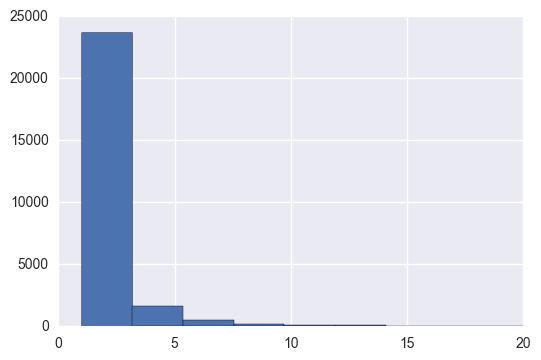

In [10]:
### statistics on the members

grouped_member = df_members.groupby('name')

grouped_member['groupId'].count().hist(bins=50).set_xlim((0,20))

In [11]:
### Import group description


os.chdir(csv_dir)

df_groupDesc = pd.read_csv(groupDesc_file,header=0)

In [12]:
print(df_groupDesc.shape)
df_groupDesc.head()


(797, 4)


,groupId,name,id,urlkey
0,285698,New In Town,1273,newintown
1,285698,Opera,2812,opera
2,285698,Social Networking,4422,socialnetwork
3,285698,Museum,7319,museum
4,285698,Arts & Entertainment,10574,arts


In [13]:
## import groups names 

os.chdir(csv_dir)

df_group = pd.read_csv(group_file,header=0)

In [14]:
print(df_group.shape)
df_group.head()


(64, 9)


,id,name,urlname,link,rating,created,description,organiserName,organiserMemberId
0,285698,Houston Art & Museum Events,hamemg,http://www.meetup.com/hamemg/,4.68,1153169987000,<p><span><em><strong> <br></strong></em></span...,"Kathleen Craig, CTA",10949225.0
1,10167172,Houston Denver Broncos Fans Meetup Group,Houston-Denver-Broncos-Fans-Meetup-Group,http://www.meetup.com/Houston-Denver-Broncos-F...,4.74,1378688867000,<p><strong>This group is for like minded die-h...,Jim,5155810.0
2,20451804,Diabetes Free Houston 2017 Meetup,Diabetes-Free-Houston-2017-Meetup,http://www.meetup.com/Diabetes-Free-Houston-20...,0.00,1474484102000,<p>There is a lot of info out there about mana...,Shelda Keith-Magistri,98596262.0
3,14176522,Houston Big Data Science,Houston-Big-Data-Science,http://www.meetup.com/Houston-Big-Data-Science/,0.00,1398789391000,This meetup is about sharing knowledge &amp; l...,Max Schloemer,135890012.0
4,224524,NetSquared Houston,Net2Houston,http://www.meetup.com/Net2Houston/,4.71,1140298019000,<p>Social changemakers and technological forer...,NetSquared,37748782.0


#### Merge group memebership info with group description

In [15]:
df_groupMembers_description = pd.merge(df_members,df_group,how='left', left_on='groupId', right_on='id')

In [16]:
print(df_groupMembers_description.shape)
df_groupMembers_description.head()

(53441, 15)


,Unnamed: 0,id_x,name_x,joined,topics,groupId,id_y,name_y,urlname,link,rating,created,description,organiserName,organiserMemberId
0,1,159683422,*Hu M.,2014-10-12 02:13:01,NaN,10167172,10167172,Houston Denver Broncos Fans Meetup Group,Houston-Denver-Broncos-Fans-Meetup-Group,http://www.meetup.com/Houston-Denver-Broncos-F...,4.74,1378688867000,<p><strong>This group is for like minded die-h...,Jim,5155810.0
1,2,192792055,Aaron,2015-09-27 11:58:15,NaN,10167172,10167172,Houston Denver Broncos Fans Meetup Group,Houston-Denver-Broncos-Fans-Meetup-Group,http://www.meetup.com/Houston-Denver-Broncos-F...,4.74,1378688867000,<p><strong>This group is for like minded die-h...,Jim,5155810.0
2,3,103532262,Aaron Close,2014-01-29 14:12:38,NaN,10167172,10167172,Houston Denver Broncos Fans Meetup Group,Houston-Denver-Broncos-Fans-Meetup-Group,http://www.meetup.com/Houston-Denver-Broncos-F...,4.74,1378688867000,<p><strong>This group is for like minded die-h...,Jim,5155810.0
3,4,162604302,Aaron Cook,2014-08-20 15:54:55,NaN,10167172,10167172,Houston Denver Broncos Fans Meetup Group,Houston-Denver-Broncos-Fans-Meetup-Group,http://www.meetup.com/Houston-Denver-Broncos-F...,4.74,1378688867000,<p><strong>This group is for like minded die-h...,Jim,5155810.0
4,5,215530256,Aaron K. Wright,2016-10-24 15:50:31,NaN,10167172,10167172,Houston Denver Broncos Fans Meetup Group,Houston-Denver-Broncos-Fans-Meetup-Group,http://www.meetup.com/Houston-Denver-Broncos-F...,4.74,1378688867000,<p><strong>This group is for like minded die-h...,Jim,5155810.0


In [17]:
## Write the member name with group and description

os.chdir(data_dir)
member_desc_file = r'member_desc_meetup.csv'


df_groupMembers_description.to_csv(member_desc_file)


In [18]:
### Select columns from df_groupMembers_description

columns_select = ['id_x','name_x','groupId','name_y']

df_groupMembers_select = df_groupMembers_description[columns_select]

print(df_groupMembers_select.shape)

(53441, 4)


In [19]:
#### Pivot the long pandas dataframe and create a matrix with groups vs members

In [20]:
df_groupMembers_matrix = pd.pivot_table(df_groupMembers_select,index='name_x', columns='name_y', values='id_x')

In [21]:
df_groupMembers_matrix.shape

(26395, 57)

In [22]:
df_groupMembers_matrix.head()

name_y,ACM Houston,Analytics.Club Houston,Big Data Developers in Houston,Big Data Houston,Chinese speakers in Houston,Christian Social Club,Christian Synergy,Deer Park Professionals,Diabetes Free Houston 2017 Meetup,Friday Night Lights Texas High School Football,...,StartUp SEO,TIBCO Houston User Group,"The Get Down, Houston Meetup",The Houston Machine Learning Group,The West End Runners Club,Urban Bubbleball Meetup,West Houston Urban 20's & 30's Hangouts & Sports,Women In Film -TV - Digital Media & Publishing,Woodlands Technical Writers Guild,iNova45 A Create Tank
name_x,,,,,,,,,,,,,,,,,,,,,
Colleen Mac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daniel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Francis Abara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Peter Das Ghosh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_groupMembers_matrix_clean = df_groupMembers_matrix.fillna(0)

In [24]:
df_groupMembers_matrix_clean.head()

name_y,ACM Houston,Analytics.Club Houston,Big Data Developers in Houston,Big Data Houston,Chinese speakers in Houston,Christian Social Club,Christian Synergy,Deer Park Professionals,Diabetes Free Houston 2017 Meetup,Friday Night Lights Texas High School Football,...,StartUp SEO,TIBCO Houston User Group,"The Get Down, Houston Meetup",The Houston Machine Learning Group,The West End Runners Club,Urban Bubbleball Meetup,West Houston Urban 20's & 30's Hangouts & Sports,Women In Film -TV - Digital Media & Publishing,Woodlands Technical Writers Guild,iNova45 A Create Tank
name_x,,,,,,,,,,,,,,,,,,,,,
Colleen Mac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daniel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eric Davis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Francis Abara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peter Das Ghosh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_groupMembers_matrix_clean[df_groupMembers_matrix_clean > 0] = 1

In [26]:
df_groupMembers_matrix_clean.to_csv("test.csv")

#### make cluster heatmaps from pandas table

In [30]:
## Select the members(rows) with memberships in 5 or more group

df_groupMembers_matrix_select5 = df_groupMembers_matrix_clean[df_groupMembers_matrix_clean.sum(axis=1) >= 5]

df_groupMembers_matrix_select5.shape

(1505, 57)

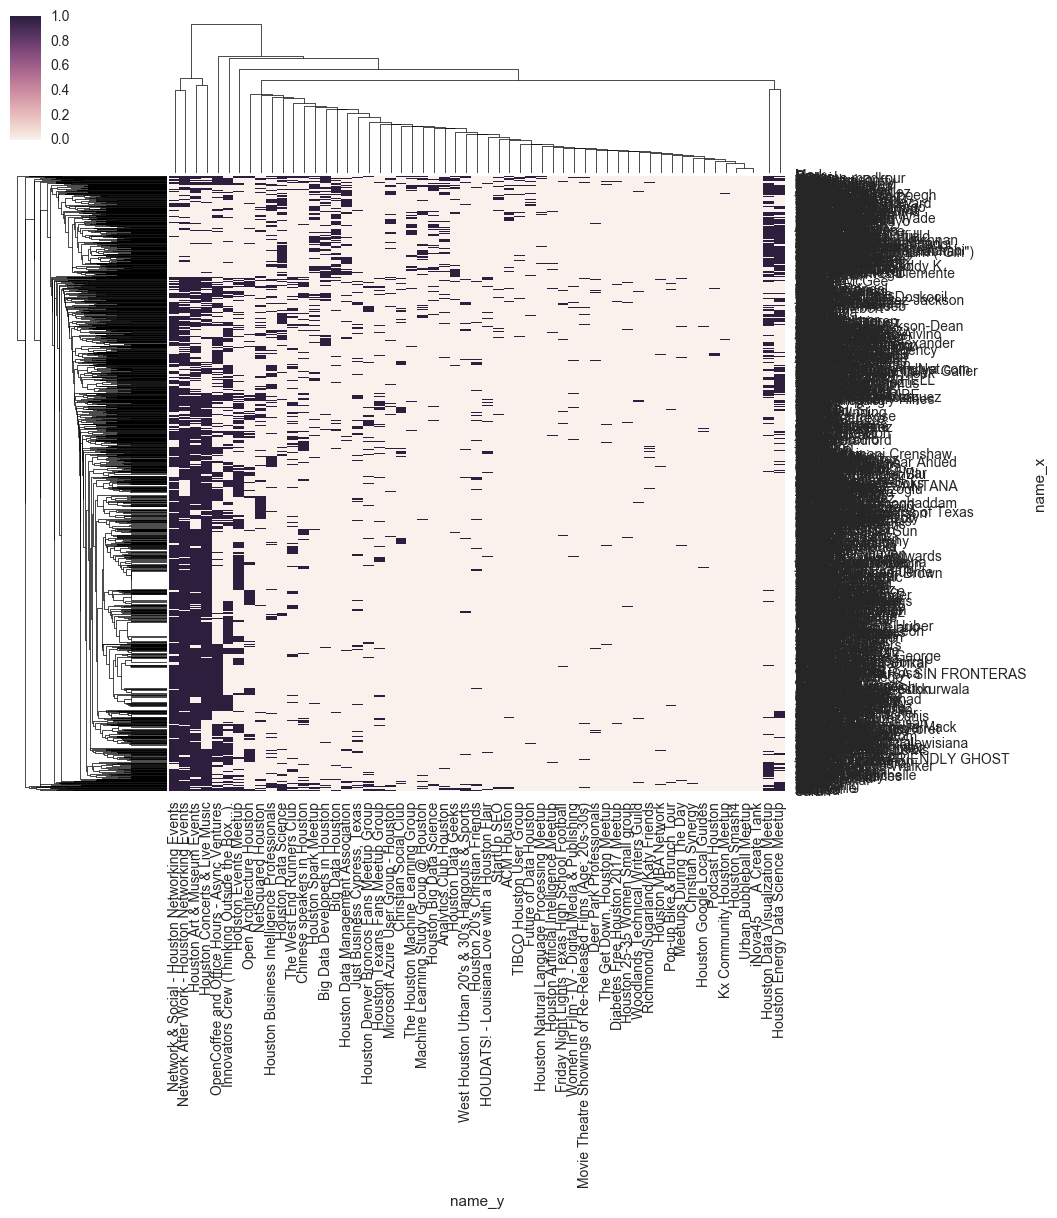

In [36]:
### Cluster the members using scipy

g = sns.clustermap(df_groupMembers_matrix_select5)

plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.show()

#### UNsupervised clustering using scikit-learn and scipy

In [10]:
## Import rsvps

df_rsvp = pd.read_csv(rsvp_file,header=0)

FileNotFoundError: File b'rsvps-ts.csv' does not exist

In [11]:
print(df_rsvp.shape)
df_rsvp.head()

NameError: name 'df_rsvp' is not defined

In [29]:
df_rsvp['event_id']

0           100083132
1           100083132
2           100083132
3           100083132
4           100083132
5           100083132
6           100083132
7           100083132
8           100083132
9           100083132
10          100161762
11          100161762
12          100161762
13          100161762
14          100161762
15          100161762
16          100161762
17          100161762
18          100161762
19          100161762
20          100161762
21          100161762
22          100161762
23          100161762
24           10032412
25           10032412
26           10032412
27           10032412
28           10032412
29           10032412
             ...     
42717    wvsfcmywmbkc
42718    wvsfcmywmbrb
42719    wvsfcmywnbhc
42720    wvsfcmywnbpb
42721    xjxtxlyvnbsb
42722    xjxtxlyvnbsb
42723    xjxtxlyvnbsb
42724    xjxtxlyvnbsb
42725    xjxtxlyvnbsb
42726    xjxtxlyvnbsb
42727    xjxtxlyvpbpb
42728    xjxtxlyvpbpb
42729    xjxtxlyvpbpb
42730    xjxtxlyvqbmb
42731    x

(0, 50)

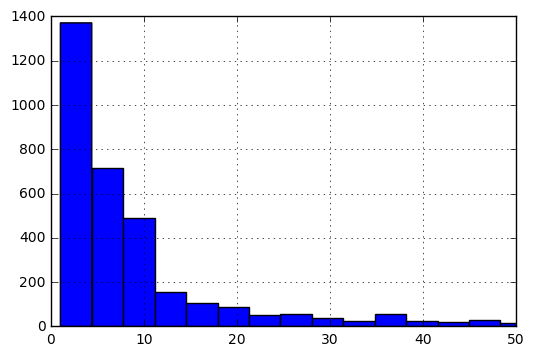

In [25]:
### statistics on the members

grouped_rsvp = df_rsvp.groupby('event_id')

grouped_rsvp['member_id'].count().hist(bins=50).set_xlim((0,50))